In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as meth
from numpy.linalg import norm 

In [2]:
# Constants
G = 6.67430e-11  # gravitational constant
m_BH = 1.293e40  # mass of the black hole
c = 2.998e8 # speed of light

In [3]:
# Calculating radii
r_BH = 2*G*m_BH/c**2
r_ph = 1.5*r_BH

In [4]:
# Simulation parameters
dt = 100  # time step
t_max = 1000000  # maximum simulation time

In [5]:
# Arrays to store the time
t_values = np.arange(0, t_max, dt)

In [6]:
# Arrays to store trajectory
r_cart = np.zeros((len(t_values), 2))

In [7]:
# Black hole boundary
x = np.linspace(0, 2*np.pi, 100)

In [8]:
# Initial Conditions
space = np.linspace(2*r_BH, 3.5*r_BH, 15)
s = 5*r_BH

For photons the equation for energy (per unit mass) near a black hole is 

E = (1/2) * v^2 + L^2/2r^2 - L^2 * r_BH/r^3

The only way this differs from the energy of a normal body with mass is the third term. The negative sign of the term is responsible for photons close to the blackhole to have unstable orbits and spiral inwards.

We can obtain the acceleration equation from this equation by using energy conservation and differentiating the equation wrt time

In [15]:
# Radial acceration function
def a(L, x):
    a_r = (L**2)*(1-1.5*(r_BH/x))/x**3
    return a_r

# Angular velocity function
def v(L, x):
    ang = L/x**2
    return ang

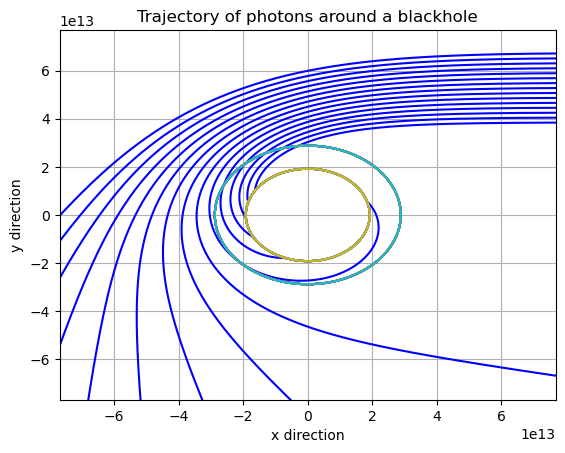

In [16]:
for d in space:
    # Initial parameters for trajectory
    r_0  = np.array([s, d])  # initial coordinates
    v_0 = -c*s/(s**2+d**2)**0.5  # initial radial velocity
    L = c*d # angular momentum

    # Setting the conditions into arrays
    r_cart[0,:] = r_0

    counter = 0
    # Euler Richardson Numerical integration loop
    for i in range(0,len(t_values)-1):
        v_mid = v_0 + 0.5*a(L, norm(r_cart[i,:]))*dt
        R_mid = norm(r_cart[i,:]) + 0.5*v_mid*dt
        R = norm(r_cart[i,:]) + v_mid*dt
        theta = meth.atan2(r_cart[i,1],r_cart[i,0]) + v(L, R_mid)*dt
        if R >= r_BH:
            r_cart[i+1,:] = np.array([R*np.cos(theta),R*np.sin(theta)])
            counter  = counter + 1
        if R < r_BH:
            break
        v_0 = v_0 + a(L, norm(R_mid))*dt

    # Plotting the trajectory
    plt.plot(r_cart[0:counter-1, 0], r_cart[0:counter-1, 1], color = 'b')
    plt.plot(r_BH*np.cos(x), r_BH*np.sin(x), markerfacecolor='black')
    plt.plot(r_ph*np.cos(x), r_ph*np.sin(x))
    plt.xlim(-4*r_BH,4*r_BH)
    plt.ylim(-4*r_BH,4*r_BH)
    plt.title("Trajectory of photons around a blackhole")
    plt.xlabel("x direction")
    plt.ylabel("y direction")
    plt.grid(True)